In [ ]:
#Importing The Required Libraries
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import pandas_datareader as pdr

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Dense, Activation

from sklearn import preprocessing, metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df= pd.read_csv('/content/INFY_Final_CNN.csv')
df

,Date,close,compund,neg,neu,pos,open,high,low,volume
0,04-04-2016,621.849976,0.0000,0.000,1.000,0.000,606.775024,624.000000,606.775024,4577054
1,05-04-2016,609.900024,0.3818,0.000,0.843,0.157,621.000000,621.150024,607.000000,4790716
2,07-04-2016,590.750000,0.0000,0.000,1.000,0.000,604.200012,604.200012,587.500000,5657890
3,11-04-2016,591.950012,-0.4767,0.237,0.763,0.000,582.900024,593.375000,575.549988,5768678
4,12-04-2016,591.099976,0.8807,0.000,0.263,0.737,590.250000,597.450012,589.299988,5842138
...,...,...,...,...,...,...,...,...,...,...
1108,23-04-2021,1333.800049,0.0000,0.000,1.000,0.000,1343.000000,1348.400024,1331.000000,7316262
1109,26-04-2021,1343.550049,0.8225,0.000,0.751,0.249,1332.250000,1351.300049,1321.000000,7088606
1110,27-04-2021,1348.500000,0.2960,0.049,0.852,0.099,1346.000000,1353.000000,1340.150024,3636115
1111,28-04-2021,1356.000000,0.2023,0.000,0.964,0.036,1358.000000,1359.500000,1344.599976,4879234


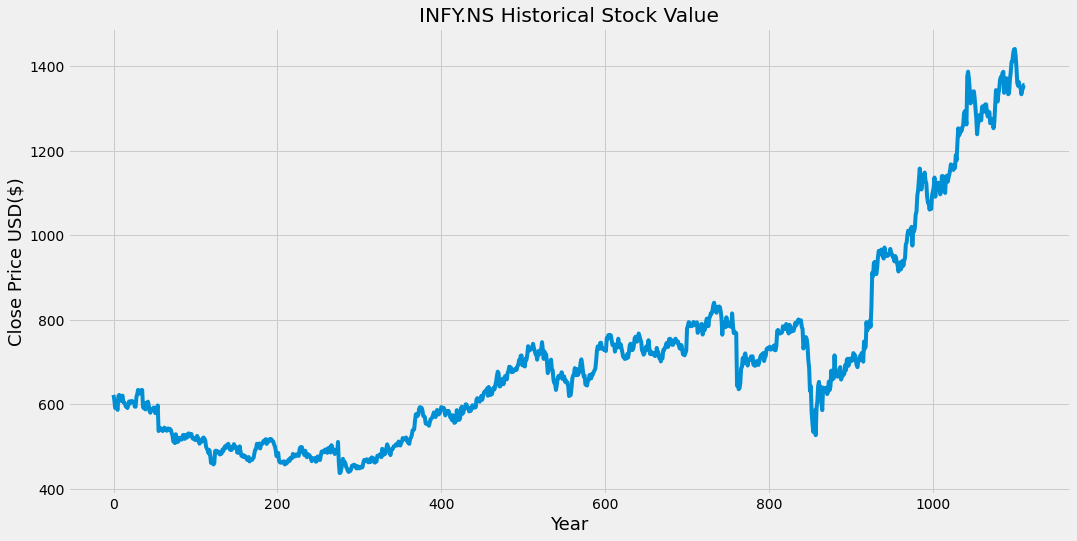

In [ ]:
# Showing the graph of Historical Stock Value of AAPL
plt.figure(figsize=(16,8))
plt.plot(df['close'])
plt.title('INFY.NS Historical Stock Value')
plt.xlabel('Year',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [ ]:
df = df.drop(columns=['Date','open','high','low','volume'])
df

,close,compund,neg,neu,pos
0,621.849976,0.0000,0.000,1.000,0.000
1,609.900024,0.3818,0.000,0.843,0.157
2,590.750000,0.0000,0.000,1.000,0.000
3,591.950012,-0.4767,0.237,0.763,0.000
4,591.099976,0.8807,0.000,0.263,0.737
...,...,...,...,...,...
1108,1333.800049,0.0000,0.000,1.000,0.000
1109,1343.550049,0.8225,0.000,0.751,0.249
1110,1348.500000,0.2960,0.049,0.852,0.099
1111,1356.000000,0.2023,0.000,0.964,0.036


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
#df = scaler.fit_transform(df)  
#y_close = df[:,0]
scaled_data=scaler.fit_transform(df)

In [ ]:
scaled_data

array([[0.18434804, 0.49562358, 0.        , 1.        , 0.        ],
       [0.17244985, 0.68879332, 0.        , 0.78697422, 0.21302578],
       [0.15338277, 0.49562358, 0.        , 1.        , 0.        ],
       ...,
       [0.9078508 , 0.64538325, 0.07777778, 0.79918589, 0.13432836],
       [0.91531832, 0.59797622, 0.        , 0.95115332, 0.04884668],
       [0.91566678, 0.88940046, 0.        , 0.9036635 , 0.0963365 ]])

In [ ]:
training_data_len=math.ceil(len(df) * .8 )

training_data_len

891

In [ ]:
steps=20

In [ ]:
# Create the training  Data set
# Create the Scaled Training data set
train_data=scaled_data[0:training_data_len]

#split the data into X_train and Y_train data sets
X_train=[]
Y_train=[]

for i in range(steps,len(train_data)):
  X_train.append(train_data[i-steps:i])
  Y_train.append(train_data[i,0])
  if i<=steps:
    print(X_train)
    print(Y_train)
    print()

[array([[0.18434804, 0.49562358, 0.        , 1.        , 0.        ],
       [0.17244985, 0.68879332, 0.        , 0.78697422, 0.21302578],
       [0.15338277, 0.49562358, 0.        , 1.        , 0.        ],
       [0.15457758, 0.25443967, 0.37619048, 0.67842605, 0.        ],
       [0.15373123, 0.94120921, 0.        , 0.        , 1.        ],
       [0.1490018 , 0.49562358, 0.        , 1.        , 0.        ],
       [0.18185887, 0.49562358, 0.        , 1.        , 0.        ],
       [0.18429827, 0.75330129, 0.        , 0.79918589, 0.20081411],
       [0.17568577, 0.29228434, 0.1968254 , 0.83175034, 0.        ],
       [0.17048337, 0.16797369, 0.32698413, 0.61601085, 0.10583446],
       [0.17859809, 0.07948394, 0.88730159, 0.24151967, 0.        ],
       [0.18258077, 0.71844169, 0.1047619 , 0.77204885, 0.13839891],
       [0.1671479 , 0.78497344, 0.12063492, 0.74084125, 0.15468114],
       [0.16662515, 0.67837086, 0.        , 0.83446404, 0.16553596],
       [0.16311545, 0.49562358, 0

In [ ]:
#Convert X_train and Y_train into numpy array
X_train,Y_train=np.array(X_train),np.array(Y_train)

In [ ]:
print("Shape of x_train: {}".format(X_train.shape))
#print("Shape of x_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(Y_train.shape))
#print("Shape of y_test: {}".format(Y_test.shape))
#print(X_train.dim)

Shape of x_train: (871, 20, 5)
Shape of y_train: (871,)


In [ ]:
#Building the LSTM Model
# setting the seed to achieve consistent and less random predictions at each execution
np.random.seed(2016)

# setting the model architecture
model=Sequential()
model.add(LSTM(50,return_sequences=True,activation='tanh',input_shape=(X_train.shape[1],5)))
model.add(Dropout(0.1))
#model.add(LSTM(50,return_sequences=True,activation='tanh'))
#model.add(Dropout(0.1))
model.add(LSTM(50,activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(1))

# printing the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 20, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 31,451
Trainable params: 31,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model

model.compile(loss='mse' , optimizer='adam')

# fitting the model using the training dataset
model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
44/44 [==============================] - 5s 40ms/step - loss: 0.0094 - val_loss: 0.0023
Epoch 2/30
44/44 [==============================] - 1s 19ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 3/30
44/44 [==============================] - 1s 20ms/step - loss: 6.3836e-04 - val_loss: 0.0022
Epoch 4/30
44/44 [==============================] - 1s 19ms/step - loss: 6.3263e-04 - val_loss: 0.0019
Epoch 5/30
44/44 [==============================] - 1s 19ms/step - loss: 6.8648e-04 - val_loss: 0.0022
Epoch 6/30
44/44 [==============================] - 1s 18ms/step - loss: 5.8669e-04 - val_loss: 0.0017
Epoch 7/30
44/44 [==============================] - 1s 18ms/step - loss: 5.2061e-04 - val_loss: 0.0019
Epoch 8/30
44/44 [==============================] - 1s 19ms/step - loss: 5.9110e-04 - val_loss: 0.0018
Epoch 9/30
44/44 [==============================] - 1s 19ms/step - loss: 6.3633e-04 - val_loss: 0.0016
Epoch 10/30
44/44 [==============================] - 1s 19ms/step - loss: 4.6636e

In [ ]:
# Create the Testing Data Set
# Create a new array containing scaled values from index 1744 to 2254
test_data=scaled_data[training_data_len - steps:]

# Create the Datasets X_test and Y_test
X_test=[]
Y_test=df[training_data_len:]
for i in range(steps,len(test_data)):
  X_test.append(test_data[i-steps:i])



In [ ]:
#Convert the Data to a numpy array
X_test=np.array(X_test)

In [ ]:
# Reshaping the Data
#X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
prediction=model.predict(X_test)

In [ ]:
pred_temp = np.zeros(shape=(len(prediction), 5) )
# put the predicted values in the right field
pred_temp[:,0] = prediction[:,0]
# inverse transform and then select the right field

pred_temp=scaler.inverse_transform(pred_temp)[:,0]
pred_temp

array([ 679.00452531,  674.02438534,  673.68579497,  678.07040859,
        682.45624942,  689.0422991 ,  692.91753056,  696.07765748,
        699.28331092,  704.44109709,  709.73387641,  711.24145962,
        715.28556722,  719.03260009,  721.66888771,  720.73818324,
        721.30991367,  719.33428435,  716.37263628,  716.10501459,
        713.46693105,  708.07310141,  705.51352941,  703.30131784,
        707.62253556,  708.17256533,  708.66255157,  714.87849252,
        720.11526914,  728.52420533,  739.31602515,  746.57410727,
        753.4241868 ,  756.98327686,  758.71295524,  771.46699486,
        794.41020414,  813.68324583,  837.67033234,  855.74588597,
        872.24974213,  886.48685068,  893.28389077,  903.29355844,
        914.64378897,  914.93062697,  916.94675424,  929.14693281,
        937.86048659,  948.31221944,  949.78714688,  943.81937184,
        938.83240738,  940.38863003,  943.86911876,  951.64250957,
        955.57544986,  956.9723746 ,  959.35028952,  962.27039

In [ ]:
# Get the models predicted price values
#prediction=scaler.inverse_transform(prediction)
#pred = np.array(prediction)
#pred = pd.DataFrame(prediction)
#pred.to_csv('epoch_30.csv')

In [ ]:
y_test_temp=df.loc[training_data_len:,'close']
y_test_temp

891      669.549988
892      672.200012
893      692.349976
894      680.549988
895      705.450012
           ...     
1108    1333.800049
1109    1343.550049
1110    1348.500000
1111    1356.000000
1112    1356.349976
Name: close, Length: 222, dtype: float64

In [ ]:
# calculating the training mean-squared-error
train_loss = model.evaluate(X_train, Y_train, batch_size = 1)

# calculating the test mean-squared-error
test_loss = model.evaluate(X_test, Y_test, batch_size = 1)

# printing the training and the test mean-squared-errors
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

222/222 [==============================] - 2s 3ms/step - loss: 248857.0938
Train Loss = 0.0004
Test Loss = 248857.0938


In [ ]:
pred_temp

array([ 679.00452531,  674.02438534,  673.68579497,  678.07040859,
        682.45624942,  689.0422991 ,  692.91753056,  696.07765748,
        699.28331092,  704.44109709,  709.73387641,  711.24145962,
        715.28556722,  719.03260009,  721.66888771,  720.73818324,
        721.30991367,  719.33428435,  716.37263628,  716.10501459,
        713.46693105,  708.07310141,  705.51352941,  703.30131784,
        707.62253556,  708.17256533,  708.66255157,  714.87849252,
        720.11526914,  728.52420533,  739.31602515,  746.57410727,
        753.4241868 ,  756.98327686,  758.71295524,  771.46699486,
        794.41020414,  813.68324583,  837.67033234,  855.74588597,
        872.24974213,  886.48685068,  893.28389077,  903.29355844,
        914.64378897,  914.93062697,  916.94675424,  929.14693281,
        937.86048659,  948.31221944,  949.78714688,  943.81937184,
        938.83240738,  940.38863003,  943.86911876,  951.64250957,
        955.57544986,  956.9723746 ,  959.35028952,  962.27039

In [ ]:
# calculating root mean squared error using sklearn.metrics package
rmse = metrics.mean_squared_error(y_test_temp, pred_temp)
print('Root Mean Square Error (sklearn.metrics) =', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics) = 61.0442


In [ ]:
final_mape = mean_absolute_error(y_test_temp, pred_temp)
print('Mean Absolute Percentage Error (sklearn.metrics) =', round(final_mape,4))

Mean Absolute Percentage Error (sklearn.metrics) = 47.9996


In [ ]:
final_mse=mean_squared_error(y_test_temp,pred_temp)
print('Mean Square Error (sklearn.metrics) =', round(final_mse,4))

Mean Square Error (sklearn.metrics) = 3726.3945


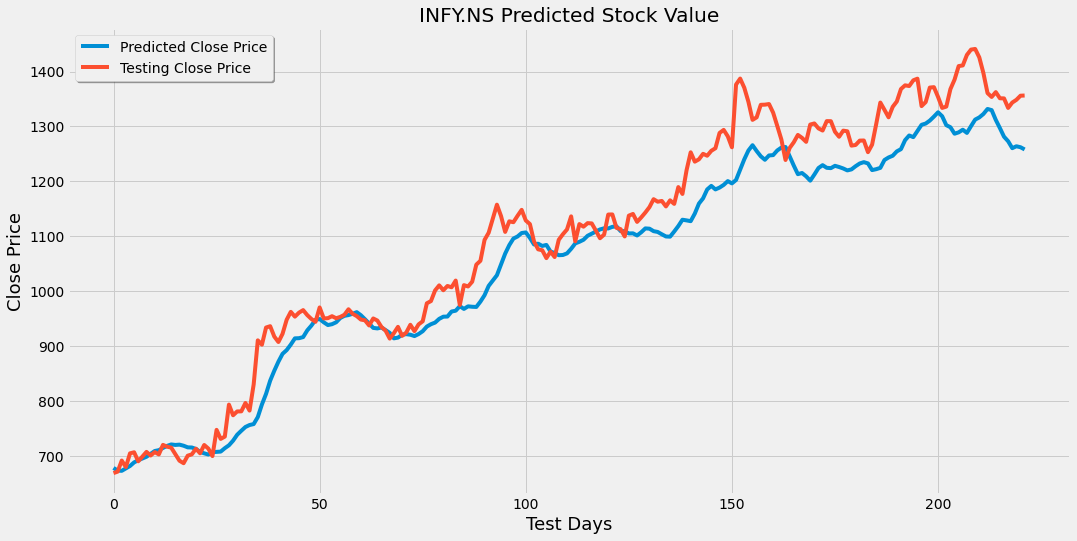

In [ ]:
# plotting
plt.figure(figsize=(16,8))
plt.title('INFY.NS Predicted Stock Value')
plt.plot(np.array(pred_temp), label="Predicted Close Price")
plt.plot(np.array(y_test_temp), label="Testing Close Price")
plt.xlabel('Test Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend(loc='top right', fancybox=True, shadow=True)
plt.show()

In [ ]:
pred_temp = np.array(pred_temp)
pred_temp = pd.DataFrame(pred_temp)
pred_temp.to_csv('epoch_30_lstm_sentiment.csv')